### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [6]:
data = pd.read_csv('data/coupons.csv')

In [8]:
data.head()



,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [11]:
#Check the count of the each feature with null value for the data cleanup
print(data.isnull().sum())

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


3. Decide what to do about your missing data -- drop, replace, other...

In [470]:
#Replacing all null with 'noValue'
data['car'] = data['car'].fillna('noValue')
data['Bar'] = data['Bar'].fillna('noValue')
data['CoffeeHouse'] = data['CoffeeHouse'].fillna('noValue')
data['CarryAway'] = data['CarryAway'].fillna('noValue')
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].fillna('noValue')
data['Restaurant20To50'] = data['Restaurant20To50'].fillna('noValue')

4. What proportion of the total observations chose to accept the coupon?



In [472]:
coupon_acceptance = data['Y'].mean()*100
print(f'Coupon acceptance percentage = {coupon_acceptance:.2f}%')


Coupon acceptance percentage = 56.84%


5. Use a bar plot to visualize the `coupon` column.

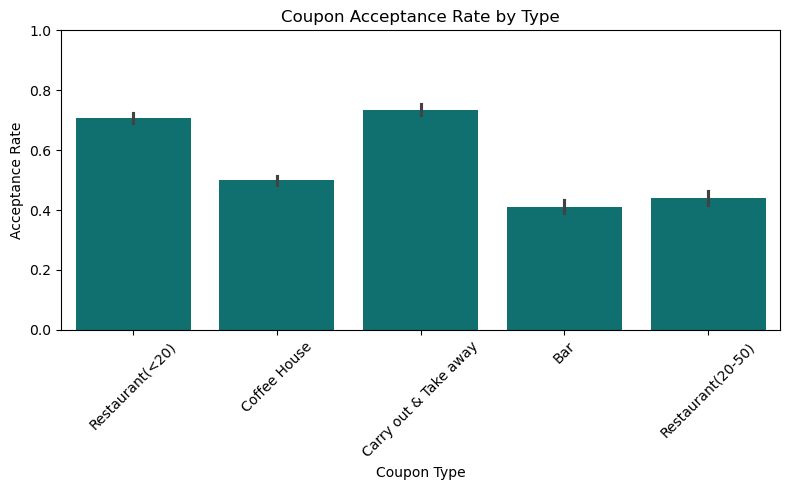

In [474]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the occurrences of 0 and 1 in the 'Y' column
coupon_counts = data['Y'].value_counts()

# Filter only accepted coupons (Y == 1)
accepted_data = data[data['Y'] == 1]

plt.figure(figsize=(8, 5))
sns.barplot(x='coupon', y='Y', data=data, color='teal')

plt.title('Coupon Acceptance Rate by Type')
plt.xlabel('Coupon Type')
plt.ylabel('Acceptance Rate')
# because acceptance rate is between 0 and 1
plt.ylim(0, 1)  
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


6. Use a histogram to visualize the temperature column.

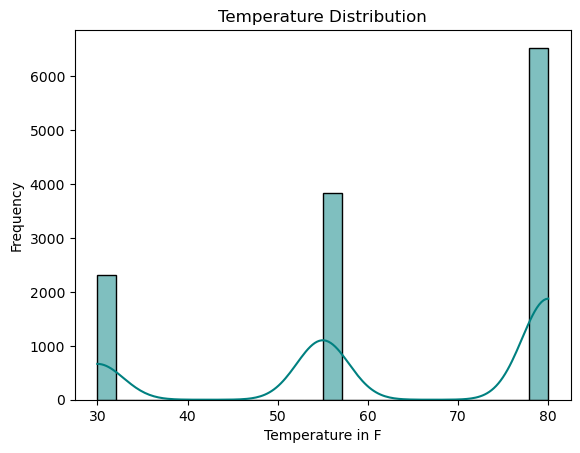

In [476]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a histogram for the 'temperature' column
sns.histplot(data['temperature'], kde='true', color='teal')

# Customize the plot
plt.title('Temperature Distribution')
plt.xlabel('Temperature in F')
plt.ylabel('Frequency')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [141]:
# Filtering just the Bar coupon from the feature.
bar_coupon_data = data.query('coupon == "Bar"')

# Display the new DataFrame
bar_coupon_data.sample()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
12237,Work,Alone,Snowy,30,7AM,Bar,1d,Female,21,Married partner,...,1~3,1~3,1~3,less1,1,1,1,0,1,0


2. What proportion of bar coupons were accepted?


In [139]:
#Exploring below library to beautify the output with font color and bold etc.
from colorama import Fore, Style

# Extract the Bar coupon data frame .
bar_coupon_data = data.query('coupon == "Bar"')

# Calculate the mean for the Bar coupon acceptance.
bar_coupon_acceptance_mean = bar_coupon_data['Y'].mean()

# Convert the above mean to percentage
bar_coupon_acceptance_proportion = bar_coupon_acceptance_mean * 100

#Below string function f formats the percentage with 2 decimal precision .

print(f"Bar coupon acceptance rate: {Style.BRIGHT}{Fore.GREEN}{bar_coupon_acceptance_proportion:.2f}%{Style.RESET_ALL}")


Bar coupon acceptance rate: 41.00%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [300]:
# People who went to a bar <=3 times / month 
data_bar_less_thn_eq_3 = data.query('Bar == "1~3"')
#print("Unique value in Bar feature = ",data_bar_less_thn_eq_3['Bar'].unique())

# People who went to a bar > 3 / month
data_bar_gt3= data.query('(Bar == "4~8") or (Bar == "gt8")')
#print("Unique value in Bar feature = ",data_bar_gt3['Bar'].unique())

# Coupon acceptance rate for people who went to a bar <=3 times / month 
rate_bar_less_than_eq_3 = data_bar_less_thn_eq_3['Y'].mean()

# Coupon acceptance rate for people who went to a bar > 3 / month
rate_bar_gt3 = data_bar_gt3['Y'].mean()

# Convert the above means to percentage
percentage_bar_less_than_eq_3 = rate_bar_less_than_eq_3*100
percentage_bar_gt3            = rate_bar_gt3*100

print(f"Acceptance rate for those who went to a bar <=3 times per month : {Style.BRIGHT}{Fore.RED}{percentage_bar_less_than_eq_3:.2f}%{Style.RESET_ALL}")
print(f"Acceptance rate for those who went to a bar >3  per month : {Style.BRIGHT}{Fore.BLUE}{percentage_bar_gt3:.2f}%{Style.RESET_ALL}")

Acceptance rate for those who went to a bar <=3 times per month : 62.19%
Acceptance rate for those who went to a bar >3  per month : 62.25%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [248]:
#Exploring below library to beautify the output with font color and bold etc.
from colorama import Fore, Style

# Replace 50plus to 51 & below21 to 20 for integer comparision.
data['age'] = data['age'].replace('50plus', 51)
data['age'] = data['age'].replace('below21', 20)

# age is string object , change it to integer for int comparision > 25
data['age'] = data['age'].astype(int)

# Bar visit >1 and age > 25 
data_bar_gt_1_age_gt_25 = data.query('((Bar == "4~8") or (Bar == "gt8") or (Bar == "1~3")) and (age > 25 )')

# All others ==> NOT in set (Bar visit >1 and age > 25 )
data_others = data[~data.index.isin(data_bar_gt_1_age_gt_25.index)]

#Calculate mean of Bar visit >1 and age > 25 & others
mean_data_bar_gt_1_age_gt_25 = data_bar_gt_1_age_gt_25['Y'].mean()
mean_data_others = data_others['Y'].mean()

#Calculate percentage
percentage_data_bar_gt_1_age_gt_25 = mean_data_bar_gt_1_age_gt_25*100
percentage_data_others = mean_data_others*100

print(f"Acceptance rate for those who went to  Bar  >1 and age > 25 : {Style.BRIGHT}{Fore.RED}{percentage_data_bar_gt_1_age_gt_25:.2f}%{Style.RESET_ALL}")
print(f"Acceptance rate for Others  : {Style.BRIGHT}{Fore.BLUE}{percentage_data_others:.2f}%{Style.RESET_ALL}")


Acceptance rate for those who went to  Bar  >1 and age > 25 : 62.15%
Acceptance rate for Others  : 55.35%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [260]:
#Exploring below library to beautify the output with font color and bold etc.
from colorama import Fore, Style

# Bar visit >1 and passenger != kids and occupation != (farming, fishing, or forestry)
data_set1 = data.query('((Bar == "4~8") or (Bar == "gt8") or (Bar == "1~3")) and (passanger != "Kid(s)") and (occupation != "Farming Fishing & Forestry")')


# All others ==> NOT in set (Bar visit >1 and passenger != kids and occupation != (farming, fishing, or forestry))
data_set2 = data[~data.index.isin(data_set1.index)]


#Calculate mean of data_set1 & data_set2
mean_data_set1 = data_set1['Y'].mean()
mean_data_set2 = data_set2['Y'].mean()

#Calculate percentage
percentage_mean_data_set1 = mean_data_set1*100
percentage_mean_data_set2 = mean_data_set2*100

print(f"Acceptance rate for Bar visit >1 and passenger != kids and occupation != (farming, fishing, or forestry) : {Style.BRIGHT}{Fore.RED}{percentage_mean_data_set1:.2f}%{Style.RESET_ALL}")
print(f"Acceptance rate for All others ==> NOT in set (Bar visit >1 and passenger != kids and occupation != (farming, fishing, or forestry))  : {Style.BRIGHT}{Fore.BLUE}{percentage_mean_data_set2:.2f}%{Style.RESET_ALL}")

Acceptance rate for Bar visit >1 and passenger != kids and occupation != (farming, fishing, or forestry) : 62.31%
Acceptance rate for All others ==> NOT in set (Bar visit >1 and passenger != kids and occupation != (farming, fishing, or forestry))  : 54.60%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [276]:
#Exploring below library to beautify the output with font color and bold etc.
from colorama import Fore, Style

# < 50k strings in income feature
less_than_50k  = ['$37500 - $49999', '$12500 - $24999','Less than $12500','$25000 - $37499']
# go to bars more than once a month, had passengers that were not a kid, and were not widowed OR
# go to bars more than once a month and are under the age of 30 OR
# go to cheap restaurants more than 4 times a month and income is less than 50K.

# Form the query as a string
query_str1 = '((Bar == "4~8") or (Bar == "gt8") or (Bar == "1~3")) and (passanger != "Kid(s)") and (maritalStatus != "Widowed")'
query_str2 = ' or ((Bar == "4~8") or (Bar == "gt8") or (Bar == "1~3")) and (age < 30)'
query_str3 = ' or (RestaurantLessThan20 == "4~8" and income.isin(@less_than_50k))'

final_query = query_str1+query_str2+query_str3

data_set1 = data.query(final_query)
 
# All others ==> NOT in data_set1
data_set2 = data[~data.index.isin(data_set1.index)]

#Calculate mean of data_set1 & data_set2
mean_data_set1 = data_set1['Y'].mean()
mean_data_set2 = data_set2['Y'].mean()

#Calculate percentage
percentage_mean_data_set1 = mean_data_set1*100
percentage_mean_data_set2 = mean_data_set2*100

print(f"Acceptance rate for data_set1  : {Style.BRIGHT}{Fore.RED}{percentage_mean_data_set1:.2f}%{Style.RESET_ALL}")
print(f"Acceptance rate for All others  : {Style.BRIGHT}{Fore.BLUE}{percentage_mean_data_set2:.2f}%{Style.RESET_ALL}")

Acceptance rate for data_set1  : 60.31%
Acceptance rate for All others  : 54.79%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [456]:
print(f"{Style.BRIGHT}{Fore.BLUE}########## Hypothesize about drivers who accepted the bar coupons ##########{Style.RESET_ALL}")
print(f"{Style.BRIGHT}{Fore.CYAN}1. Coupon rejection is more than coupon acceptance. {Style.RESET_ALL}")
print(f"{Style.BRIGHT}{Fore.CYAN}2. Coupon acceptance rate is 56.8% , out of which 41.00% is the Bar coupon acceptance. {Style.RESET_ALL}")
print(f"{Style.BRIGHT}{Fore.CYAN}3. Drivers over the age of 25 visit bars more frequently (more than once a month) compared to younger age groups.. {Style.RESET_ALL}")
print(f"{Style.BRIGHT}{Fore.CYAN}4. Drivers with no kids and not in the occupation of farming, fishing, or forestry visit bars more frequently than parents in others.. {Style.RESET_ALL}")
print(f"{Style.BRIGHT}{Fore.CYAN}5. Drivers with age <30 and income <50k , with passanger having no kids , not widowed , visits bar more frequently and visits restaurant < $20 4-8 times a months.. {Style.RESET_ALL}")

########## Hypothesize about drivers who accepted the bar coupons ##########
1. Coupon rejection is more than coupon acceptance. 
2. Coupon acceptance rate is 56.8% , out of which 41.00% is the Bar coupon acceptance. 
3. Drivers over the age of 25 visit bars more frequently (more than once a month) compared to younger age groups.. 
4. Drivers with no kids and not in the occupation of farming, fishing, or forestry visit bars more frequently than parents in others.. 
5. Drivers with age <30 and income <50k , with passanger having no kids , not widowed , visits bar more frequently and visits restaurant < $20 4-8 times a months.. 


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [414]:
#What proportion of coffee coupons were accepted?
# Filter only coffee coupon data
coffee_data = data[data['coupon'] == 'Coffee House']

# Calculate acceptance proportion
coffee_acceptance_rate = coffee_data['Y'].mean()

# Convert to percentage
coffee_acceptance_percent = coffee_acceptance_rate * 100

print(f"Coffee coupon acceptance rate: {coffee_acceptance_percent:.2f}%")

Coffee coupon acceptance rate: 49.92%


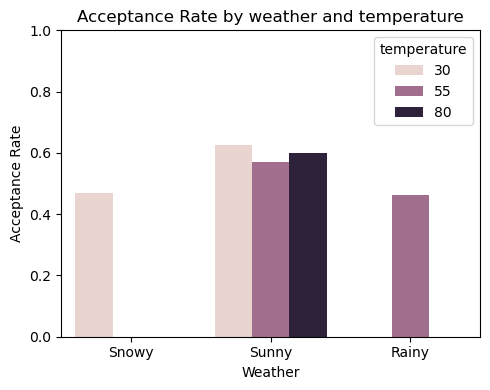

In [444]:
# Group by weather  and temperature, calculate acceptance rate
temp_weather_acceptance = data.groupby(['temperature', 'weather'])['Y'].mean().reset_index()

# Rename column for clarity
temp_weather_acceptance.rename(columns={'Y': 'acceptance_rate'}, inplace=True)

plt.figure(figsize=(5, 4))
sns.barplot(x='weather', y='acceptance_rate', hue='temperature', data=temp_weather_acceptance)
plt.title('Acceptance Rate by weather and temperature')
plt.ylabel('Acceptance Rate')
plt.xlabel('Weather')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

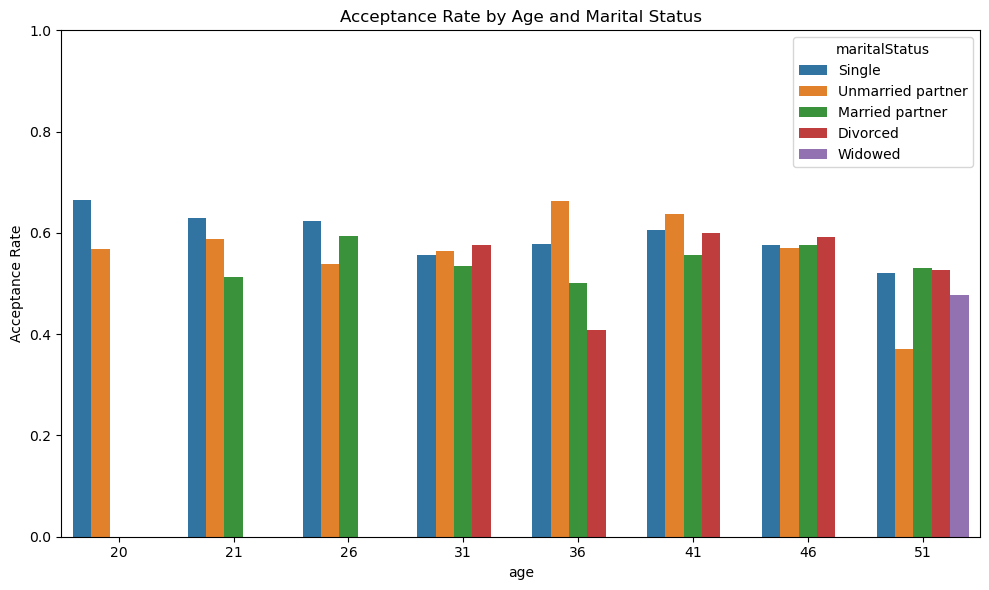

In [462]:
# Group by age and maritalStatus, calculate acceptance rate
age_marital_acceptance = data.groupby(['age', 'maritalStatus'])['Y'].mean().reset_index()

# Rename column for clarity
age_marital_acceptance.rename(columns={'Y': 'acceptance_rate'}, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='age', y='acceptance_rate', hue='maritalStatus', data=age_marital_acceptance)
plt.title('Acceptance Rate by Age and Marital Status')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

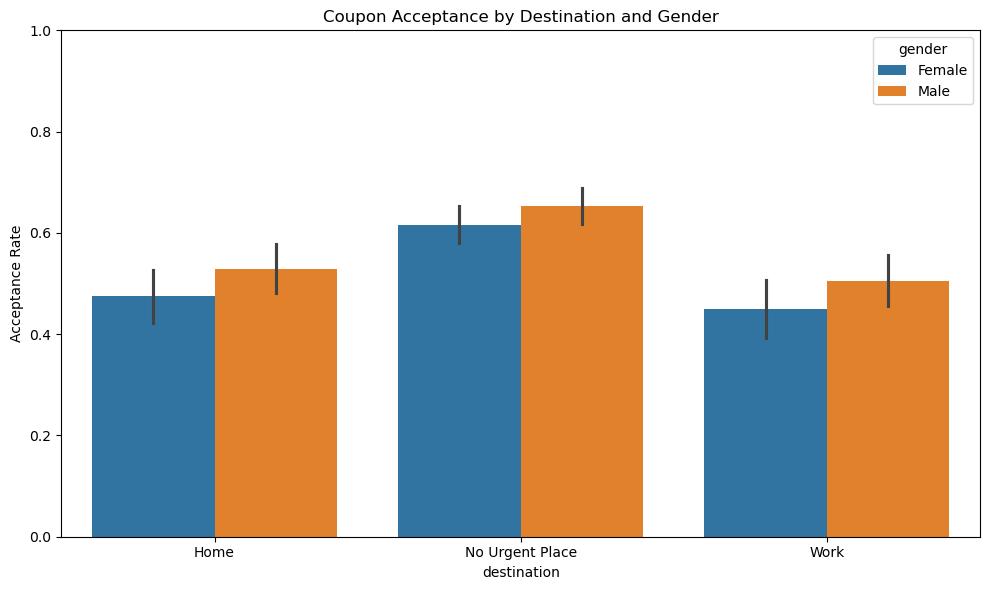

In [460]:
#how destination, gender, age, and coupon expiration impact coupon acceptance
acceptance = data.groupby(['destination', 'gender', 'age', 'expiration'])['Y'].mean().reset_index()
acceptance.rename(columns={'Y': 'acceptance_rate'}, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='destination', y='acceptance_rate', hue='gender', data=acceptance)
plt.title('Coupon Acceptance by Destination and Gender')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

In [468]:
print(f"{Style.BRIGHT}{Fore.BLUE}########## Hypothesize about drivers who accepted the coffee coupons ##########{Style.RESET_ALL}")
print(f"{Style.BRIGHT}{Fore.CYAN}1. Coffee coupon acceptance rate is 49.92%. {Style.RESET_ALL}")
print(f"{Style.BRIGHT}{Fore.CYAN}2. Sunny day with temperature of 30 F has more acceptance. {Style.RESET_ALL}")
print(f"{Style.BRIGHT}{Fore.CYAN}3. 26 years old singles and 36 years old unmarried partner has more acceptance of coffee coupons. {Style.RESET_ALL}")
print(f"{Style.BRIGHT}{Fore.CYAN}4. Male driving to non urgent destination has more acceptance than others. {Style.RESET_ALL}")


########## Hypothesize about drivers who accepted the coffee coupons ##########
1. Coffee coupon acceptance rate is 49.92%. 
2. Sunny day with temperature of 30 F has more acceptance. 
3. 26 years old singles and 36 years old unmarried partner has more acceptance of coffee coupons. 
4. Male driving to non urgent destination has more acceptance than others. 
